In [133]:
%pip install matplotlib numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [134]:
import matplotlib.pyplot as plt
import numpy as np

In [135]:
COLOR = ['red', 'brown', 'orange']

In [136]:
# Assign Step
def distance(x, y, x_starting_point, y_starting_point):
    return np.sqrt((x-x_starting_point)**2 + (y-y_starting_point)**2)

def find_closest(x, y, x_starting_point, y_starting_point):
    distances = distance(x, y, x_starting_point, y_starting_point)
    return np.argmin(distances)

def assignToNewCentroid(x, y, x_centroid, y_centroid):
    assigned_list = np.array([], dtype=int)
    for i in range(len(x)):
        closest = find_closest(x[i], y[i], x_centroid, y_centroid)

        assigned_list = np.append(assigned_list, closest)

    return assigned_list


In [137]:
# Update Centroid
def calculateNewCentroid(x, y, assigned_list):
    x_starting_point = np.array([], dtype=float)
    y_starting_point = np.array([], dtype=float)

    for i in range(np.max(assigned_list) + 1):
        x_starting_point = np.append(x_starting_point, np.mean(x[assigned_list == i]))
        y_starting_point = np.append(y_starting_point, np.mean(y[assigned_list == i]))

    return x_starting_point, y_starting_point


In [138]:
def kmeans(xpoints, ypoints, x_centroid, y_centroid):
    assigned_list_prev = []

    while True:
        assigned_list = assignToNewCentroid(xpoints, ypoints, x_centroid, y_centroid)

        if len(assigned_list_prev) != 0:
            if np.array_equal(assigned_list, assigned_list_prev):
                break

        assigned_list_prev = assigned_list[:]

        for i in range(len(xpoints)):
            plt.scatter(xpoints[i], ypoints[i], color=COLOR[assigned_list[i]])
            print(f'Assign ({xpoints[i]}, {ypoints[i]}) to Centroid: ({x_centroid[assigned_list[i]]}, {y_centroid[assigned_list[i]]})')
        
        x_centroid, y_centroid = calculateNewCentroid(xpoints, ypoints, assigned_list)

        for i in range(len(x_centroid)):
            plt.scatter(x_centroid[i], y_centroid[i], color='black')
            plt.annotate(f'New Centroid', (x_centroid[i], y_centroid[i]))
            print(f'New Centroid: ({x_centroid[i]}, {y_centroid[i]})')
        
        plt.show()
    
    return x_centroid, y_centroid, assigned_list



Assign (1, 2) to Centroid: (2, 2)
Assign (3, 3) to Centroid: (3, 3)
Assign (2, 2) to Centroid: (2, 2)
Assign (8, 8) to Centroid: (3, 3)
Assign (6, 6) to Centroid: (3, 3)
Assign (7, 7) to Centroid: (3, 3)
Assign (-3, -3) to Centroid: (-3, -3)
Assign (-2, -4) to Centroid: (-3, -3)
Assign (-7, -7) to Centroid: (-3, -3)
New Centroid: (6.0, 6.0)
New Centroid: (1.5, 2.0)
New Centroid: (-4.0, -4.666666666666667)


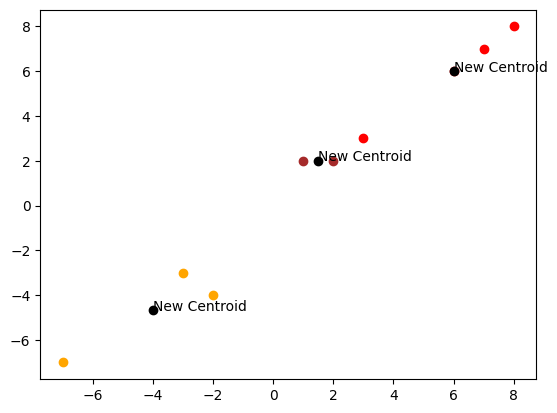

Assign (1, 2) to Centroid: (1.5, 2.0)
Assign (3, 3) to Centroid: (1.5, 2.0)
Assign (2, 2) to Centroid: (1.5, 2.0)
Assign (8, 8) to Centroid: (6.0, 6.0)
Assign (6, 6) to Centroid: (6.0, 6.0)
Assign (7, 7) to Centroid: (6.0, 6.0)
Assign (-3, -3) to Centroid: (-4.0, -4.666666666666667)
Assign (-2, -4) to Centroid: (-4.0, -4.666666666666667)
Assign (-7, -7) to Centroid: (-4.0, -4.666666666666667)
New Centroid: (7.0, 7.0)
New Centroid: (2.0, 2.3333333333333335)
New Centroid: (-4.0, -4.666666666666667)


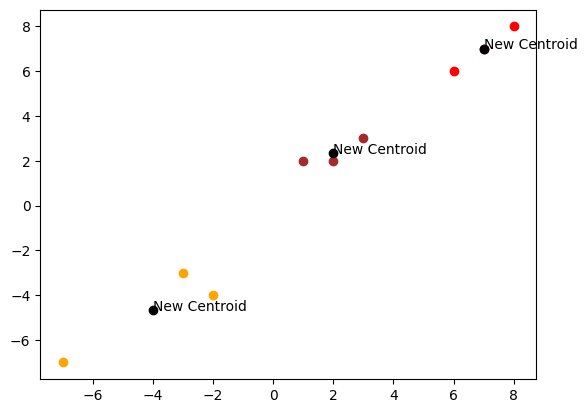

Distance Mean: 1.4744582139275695


In [139]:
xpoints = np.array([1, 3, 2, 8, 6, 7, -3, -2, -7])
ypoints = np.array([2, 3, 2, 8, 6, 7, -3, -4, -7])

x_centroid = np.array([3, 2, -3])
y_centroid = np.array([3, 2, -3])

x_centroid, y_centroid, assigned_list = kmeans(xpoints, ypoints, x_centroid, y_centroid)

distance_mean = 0.0

for i in range(len(xpoints)):
    distance_mean += distance(xpoints[i], ypoints[i], x_centroid, y_centroid)[assigned_list[i]]

distance_mean /= len(xpoints)
print(f'Distance Mean: {distance_mean}')

Assign (1, 2) to Centroid: (2, 2)
Assign (3, 3) to Centroid: (2, 2)
Assign (2, 2) to Centroid: (2, 2)
Assign (8, 8) to Centroid: (2, 2)
Assign (6, 6) to Centroid: (2, 2)
Assign (7, 7) to Centroid: (2, 2)
Assign (-3, -3) to Centroid: (-3, -3)
Assign (-2, -4) to Centroid: (-3, -3)
Assign (-7, -7) to Centroid: (-7, -7)
New Centroid: (-2.5, -3.5)
New Centroid: (4.5, 4.666666666666667)
New Centroid: (-7.0, -7.0)


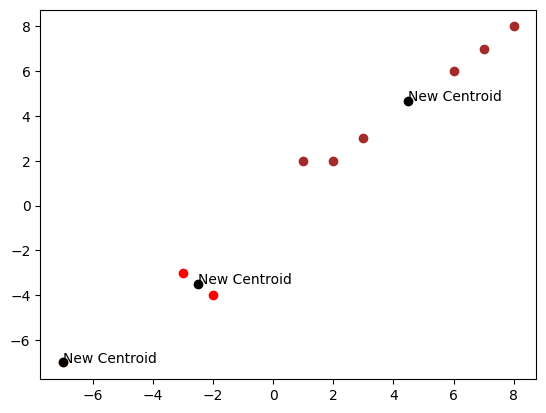

Distance Mean: 2.4413195239469854


In [140]:
xpoints = np.array([1, 3, 2, 8, 6, 7, -3, -2, -7])
ypoints = np.array([2, 3, 2, 8, 6, 7, -3, -4, -7])

x_centroid = np.array([-3, 2, -7])
y_centroid = np.array([-3, 2, -7])

x_centroid, y_centroid, assigned_list = kmeans(xpoints, ypoints, x_centroid, y_centroid)

distance_mean = 0.0

for i in range(len(xpoints)):
    distance_mean += distance(xpoints[i], ypoints[i], x_centroid, y_centroid)[assigned_list[i]]

distance_mean /= len(xpoints)
print(f'Distance Mean: {distance_mean}')